# Project-PRCP-1013-WalkRunClass

# Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

## Dataset Link:
Multi-layer neural networks will be trained and evaluated based on data from Run or Walk Reduced dataset. Note that this Run or Walk Final dataset uses only the subset of data from the original Run or Walk dataset.

Link:  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1013-WalkRunClass.zip


## Domain Knowledge
The dataset comprises the readings of motion sensors recorded while users executed typical daily activities. The detailed format is described in the package. The attributes correspond to raw sensor readings. There are a total of 11 attributes.

1.date -date of the activity

2.time - time of activity

3.username - name of the person

4.wrist - left or right wrist

5.activity - walking or running activity - 0 - walking, 1-running

6.acceleration_x - represents accelaration along x-axis

7.acceleration_y - represents accelaration along y-axis

8.acceleration_z - represents accelaration along z-axis

9.gyro_x

10.gyro_y

11.gyro_z

## Task 1:-Prepare a complete data analysis report on the given data.

### importing required libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as  dt

In [2]:
data=pd.read_csv('https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1013-WalkRunClass.zip')

In [3]:
data

date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922  
...               ...             ...             ...     ...     ...     ...  
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814  

[88588 rows x 11 columns]

### Basic Checks

In [4]:
data.head(3)

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
data.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [7]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

Extracting usefull information
as you can see the date and time is in the object form, so coverting the data and time to datetime dtype and extract the required information such as day,month,hour,minute

as the year column as only one unique column i.e 2017 not extracting that column

In [8]:
data['time_con']=pd.to_datetime(data['time'],format='%H:%M:%S:%f')

In [9]:
data['hour']=data['time_con'].dt.hour
data['minute']=data['time_con'].dt.minute
data['second']=data['time_con'].dt.second

In [10]:
data['date']=pd.to_datetime(data['date'])

In [11]:
data['nthday']=data['date'].dt.dayofweek

In [12]:
data['dayofweek']=data['date'].dt.day_name()

In [13]:
data['day']=data['date'].dt.day

In [14]:
data['Month']=data['date'].dt.month

head after extraction
head of dataframe after extracting the required information from date and time columns

In [15]:
data.head()

date                time username  wrist  activity  acceleration_x  \
0 2017-06-30  13:51:15:847724020   viktor      0         0          0.2650   
1 2017-06-30  13:51:16:246945023   viktor      0         0          0.6722   
2 2017-06-30  13:51:16:446233987   viktor      0         0          0.4399   
3 2017-06-30  13:51:16:646117985   viktor      0         0          0.3031   
4 2017-06-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4         -0.9312          0.0359  0.0527  0.4379  2.4922   

                       time_con  hour  minute  second  nthday dayofweek  day  \
0 1900-01-01 13:51:15.847724020    13      51      15       4    Friday   30   
1 1900-01-01 13:51:16.246945023    13      51      16       4    Friday   30   
2 1900-01-01 13:51:16.446233987    13      51      16       4    Friday   30   
3 1900-01-01 13:51:16.646117985    13      51      16       4    Friday   30   
4 1900-01-01 13:51:16.846738994    13      51      16       4    Friday   30   

   Month  
0      6  
1      6  
2      6  
3      6  
4      6

### Univariant analysis

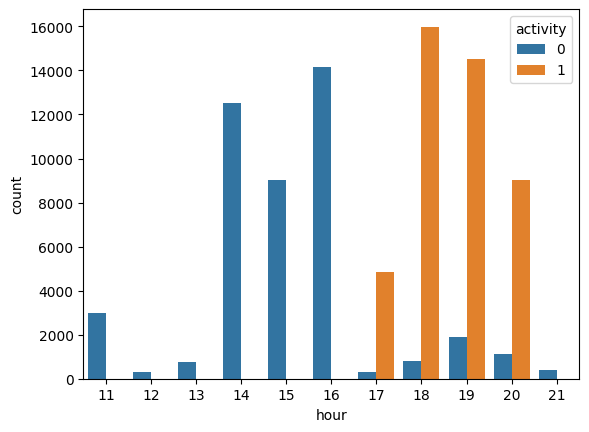

In [16]:
sns.countplot(x=data['hour'],hue=data['activity']);

**insight 1**

as the day contains 24 hours x-axis representing the hour of a day and plot of the activity over the day representing

from 11 o'clock to 4 o'clock viktor is invovled in walking and no running activity is found

after 4 o'clock viktor is useally running as all the persons do in their day to day life just like jogging and less amount of walking is found in the evening compared to running

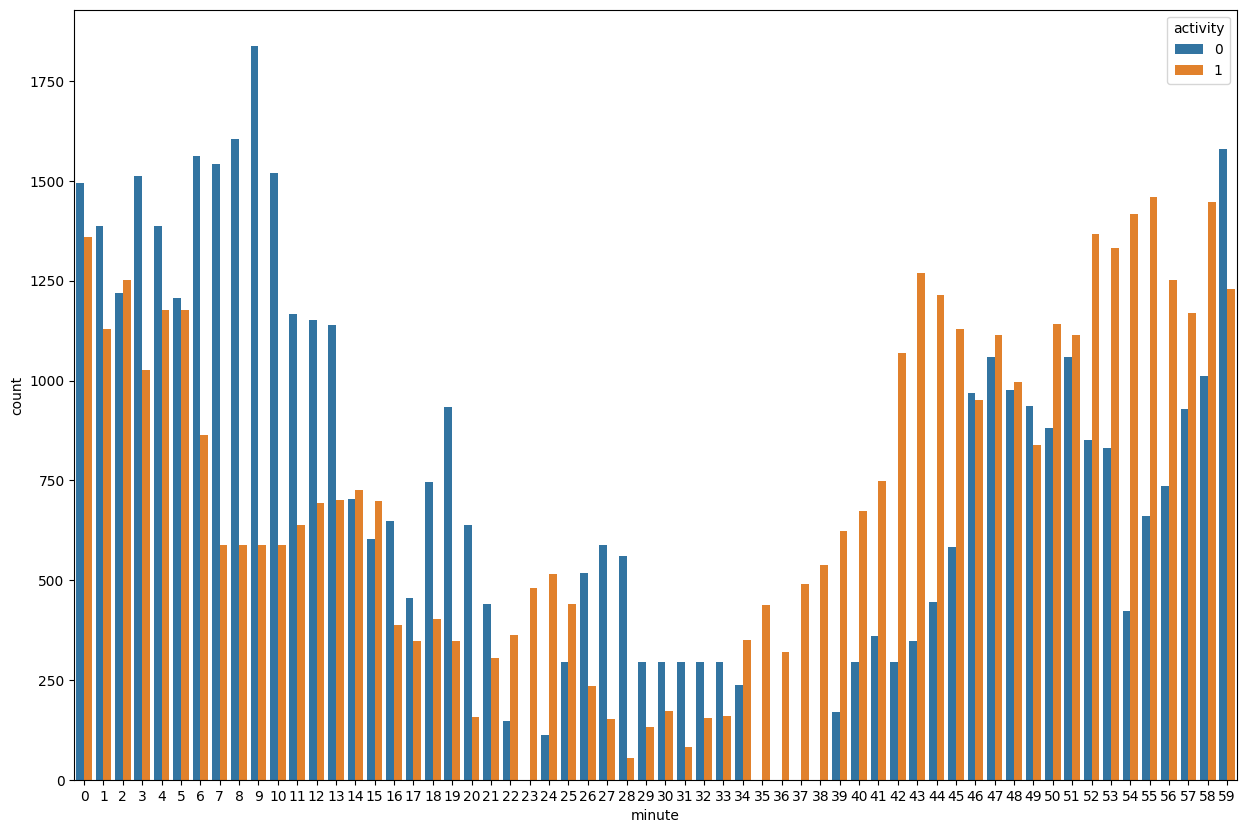

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['minute'],hue=data['activity']);

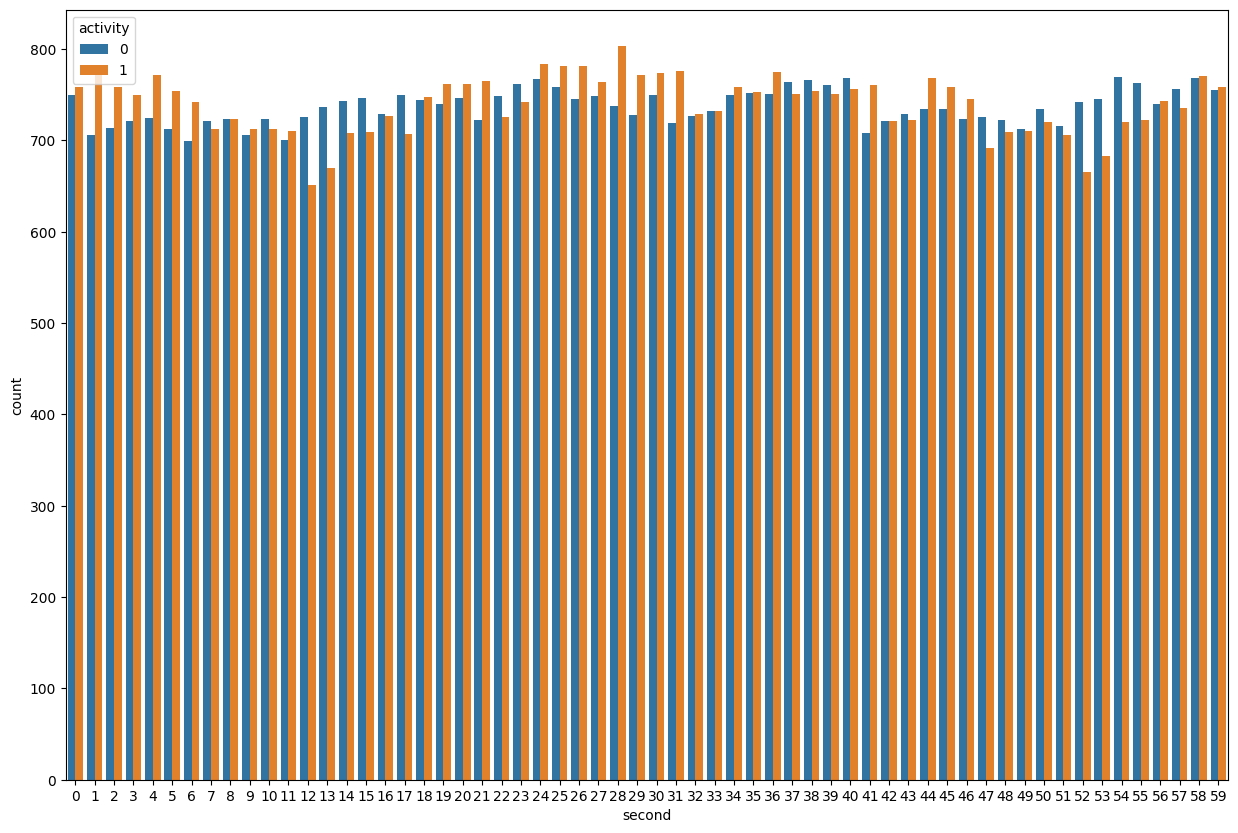

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['second'],hue=data['activity']);

**insight 2**
looking at the minute and second columns both the acitvites found to be in the similar and no such meaning full information can found after simply visualizing the graphs of these 2

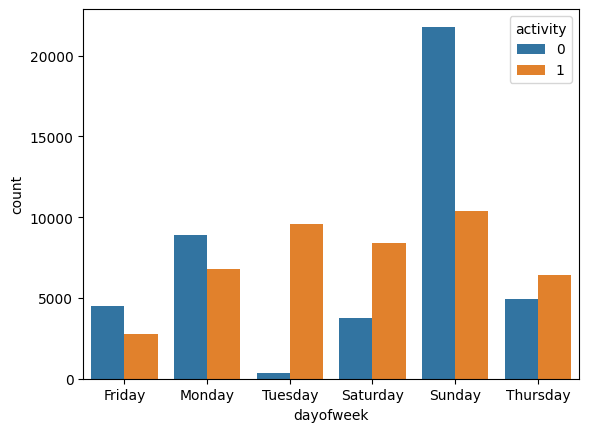

In [19]:
sns.countplot(x=data['dayofweek'],hue=data['activity']);

**insight 3**

in all the days of week viktor is running and walking with similar state

activity of viktor on sunday is more comparred to weekdays and it is a weekend

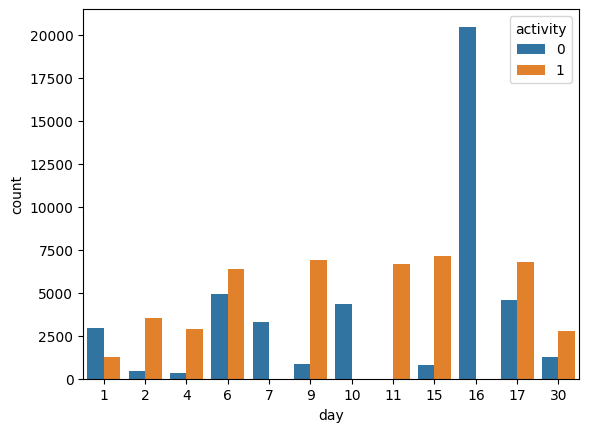

In [20]:
sns.countplot(x=data['day'],hue=data['activity']);

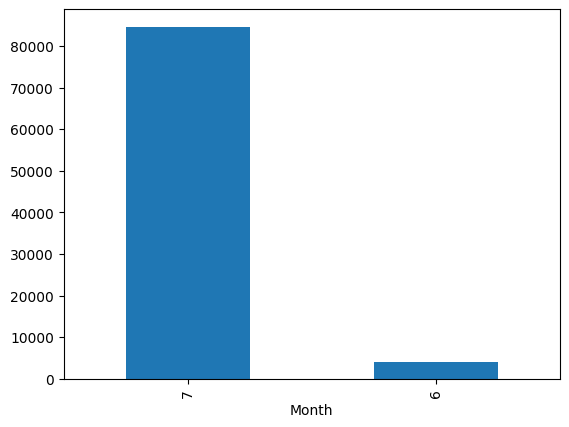

In [21]:
data['Month'].value_counts().plot(kind='bar');

most of the data is taken in 7th month and only few records are from 6th month

segregation of walking and running datasets
activity - 0- walking 1- running

as the activity telling that 0 is walking category and 1 is running category extarcting the data in the form of running and walking and visualizing the these 2 seperate data using subplots

In [22]:
run=data.loc[data['activity']==1]

In [23]:
run.head()

date                time username  wrist  activity  acceleration_x  \
755 2017-06-30  20:33:44:257565021   viktor      0         1          1.2842   
756 2017-06-30  20:33:44:457401990   viktor      0         1          0.3057   
757 2017-06-30  20:33:44:658038020   viktor      0         1          1.0601   
758 2017-06-30  20:33:44:858160972   viktor      0         1         -0.1065   
759 2017-06-30   20:33:45:57991981   viktor      0         1          1.0069   

     acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
755          0.0526         -0.2362 -1.9543  2.4977  1.3038   
756          0.4504         -0.1000  1.4730 -0.5391 -2.6030   
757         -0.9857         -0.0732  1.4300 -0.9917 -2.3499   
758         -0.7203          0.2003 -0.4013  0.4240  3.0591   
759          0.3441         -0.2760 -1.6086  2.3222  1.4736   

                         time_con  hour  minute  second  nthday dayofweek  \
755 1900-01-01 20:33:44.257565021    20      33      44       4    Friday   
756 1900-01-01 20:33:44.457401990    20      33      44       4    Friday   
757 1900-01-01 20:33:44.658038020    20      33      44       4    Friday   
758 1900-01-01 20:33:44.858160972    20      33      44       4    Friday   
759 1900-01-01 20:33:45.579919810    20      33      45       4    Friday   

     day  Month  
755   30      6  
756   30      6  
757   30      6  
758   30      6  
759   30      6

In [24]:
walk=data.loc[data['activity']==0]

In [25]:
walk.head()

date                time username  wrist  activity  acceleration_x  \
0 2017-06-30  13:51:15:847724020   viktor      0         0          0.2650   
1 2017-06-30  13:51:16:246945023   viktor      0         0          0.6722   
2 2017-06-30  13:51:16:446233987   viktor      0         0          0.4399   
3 2017-06-30  13:51:16:646117985   viktor      0         0          0.3031   
4 2017-06-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4         -0.9312          0.0359  0.0527  0.4379  2.4922   

                       time_con  hour  minute  second  nthday dayofweek  day  \
0 1900-01-01 13:51:15.847724020    13      51      15       4    Friday   30   
1 1900-01-01 13:51:16.246945023    13      51      16       4    Friday   30   
2 1900-01-01 13:51:16.446233987    13      51      16       4    Friday   30   
3 1900-01-01 13:51:16.646117985    13      51      16       4    Friday   30   
4 1900-01-01 13:51:16.846738994    13      51      16       4    Friday   30   

   Month  
0      6  
1      6  
2      6  
3      6  
4      6

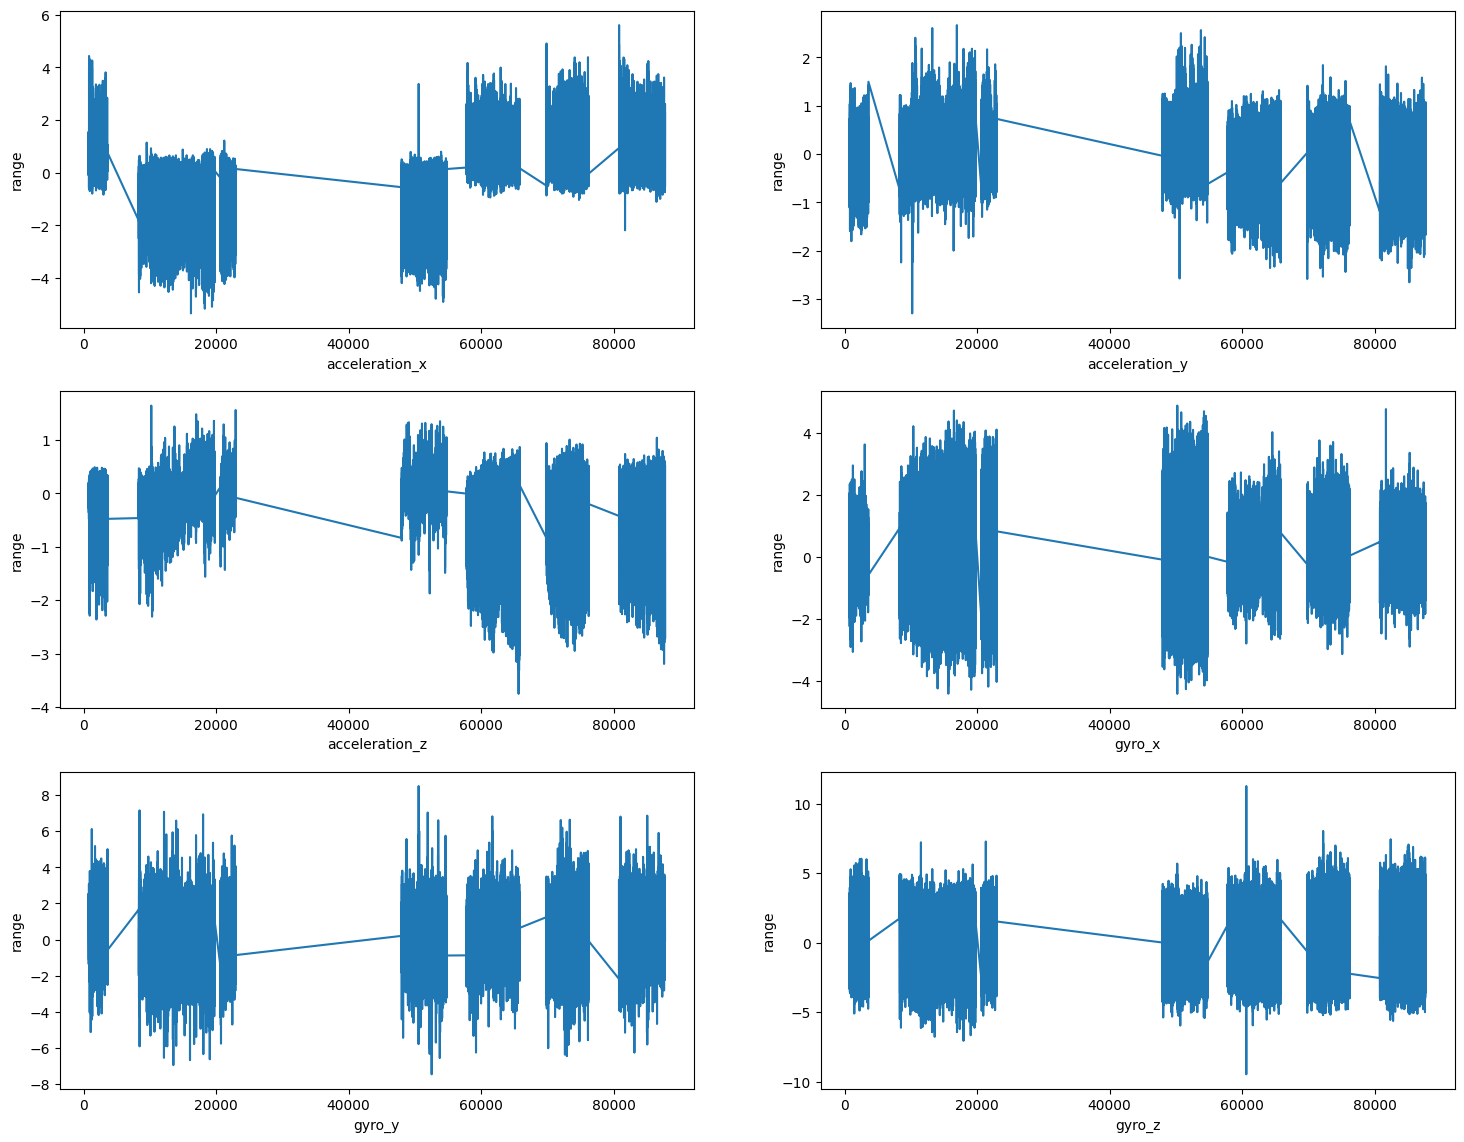

In [26]:
pl_no=1
plt.figure(figsize=(18,14))
for column in run.columns[5:11]:
    plt.subplot(3,2,pl_no)
    sns.lineplot(run[column])
    plt.xlabel(column)
    plt.ylabel("range")
    pl_no+=1
plt.show()

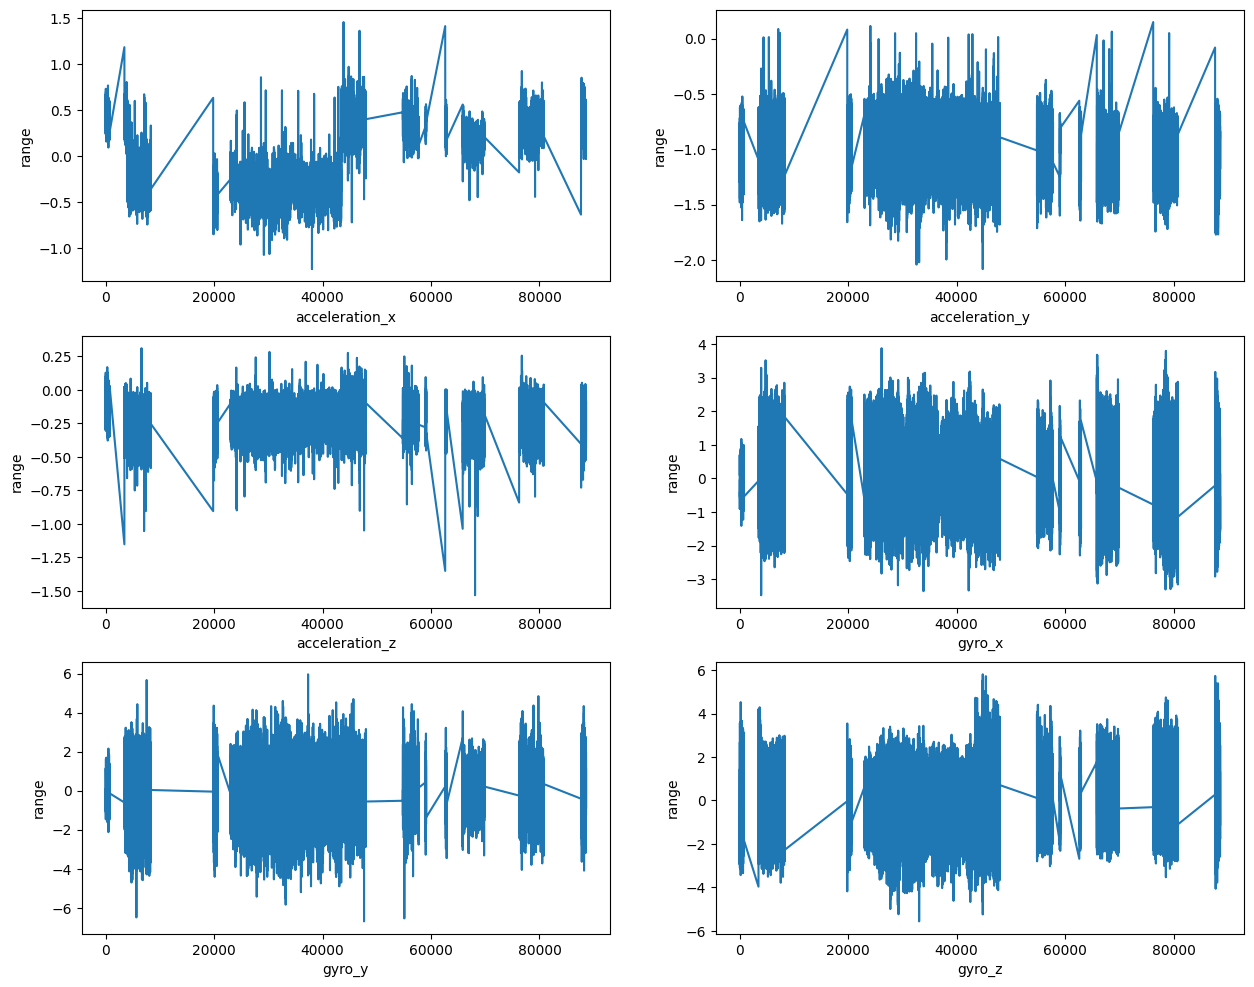

In [27]:
pl_no=1
plt.figure(figsize=(15,12))
for column in walk.columns[5:11]:
    plt.subplot(3,2,pl_no)
    sns.lineplot(walk[column])
    plt.xlabel(column)
    plt.ylabel("range")
    pl_no+=1
plt.show()

**insight 4**

accelaration-x - accelaration of the person while running is in the range of -4 to 6 where as the accelaration of person while walking is the range of -1 to 1.5

accelaration-y - while running the rage is in between -3 to 2 where as while walking the range -2 to 0 only

accelaration-z - while running the accelaration is ranging between -4 to 1 where as while walking this is range is -1.25 to 0.25 only

but gyro of person is alomost similar no matter he is walking or running. all the values have similar range.

### Bivariant analysis

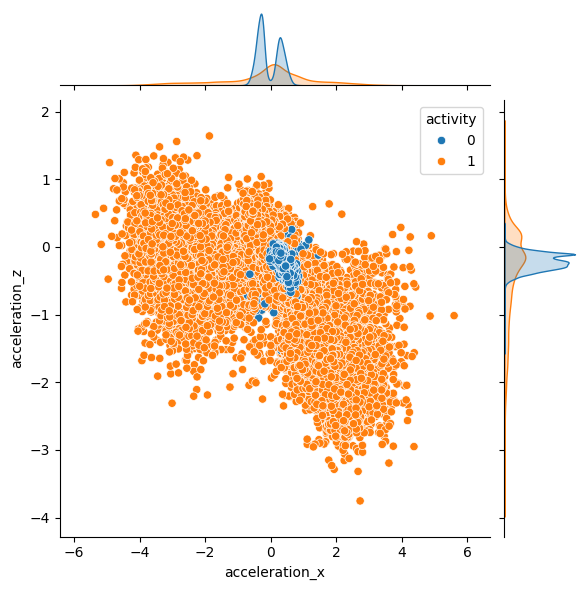

In [28]:
sns.jointplot(y=data.acceleration_z,x=data['acceleration_x'],hue=data.activity);

**insight 5**

as the accelaration of viktor along x axis is increasing the accelaration along z axis is decreasing

and as the accelaration of of viktor while walking is less so the walking points are alomost concetrated at the center and the datapoints while running is more widely spread and it has more range

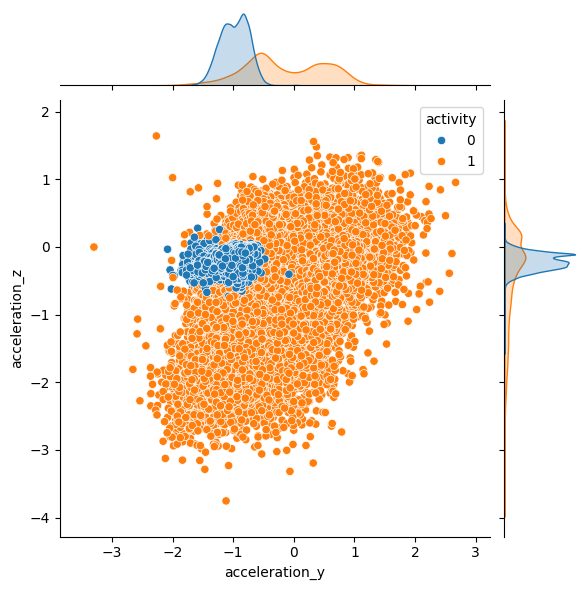

In [29]:
sns.jointplot(y=data.acceleration_z,x=data['acceleration_y'],hue=data.activity);

**insight 6**

as the accelaration of viktor along y axis is increasing the accelaration along z axis is also increasing indicating the linear relationship

In [30]:
sns.jointplot(x=data.acceleration_x,y=data['acceleration_y'],hue=data.activity);

**insight 7**
as the accelaration along x axis is increasing the accelaration along y axis is decreasing and are inversly proportional

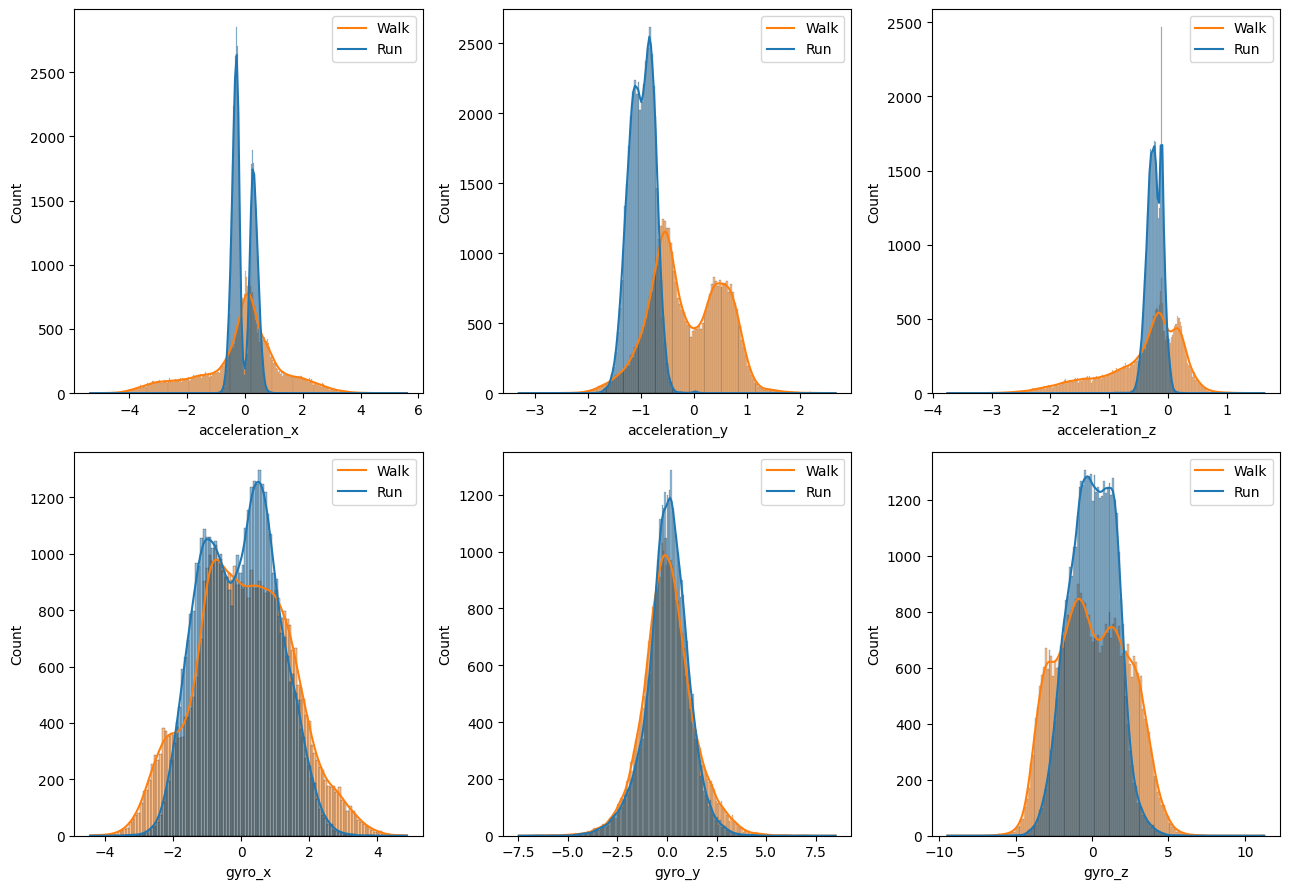

In [31]:
continuous_col = ['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']

plt.figure(figsize=(13,9))
pltnum=1
for col in continuous_col:
        if pltnum <=6:
            ax = plt.subplot(2,3,pltnum)
            sns.histplot(x=data[col],kde=True,hue=data["activity"])
            plt.legend(labels=['Walk', 'Run'])
            pltnum += 1
plt.tight_layout()
plt.show()


**Insight 8**

- acceleration_x: The distribution for Walk is wider and more spread out than Run, indicating greater variability in acceleration during walking.
- acceleration_y: The distributions for Walk and Run are more similar, with a slight overlap.
- acceleration_z: The distribution for Run is wider than Walk, suggesting more variable acceleration in the vertical direction while running.
- gyro_x: The distributions are distinct, with Walk having a wider spread and Run exhibiting a sharper peak.
- gyro_y: The distributions are more overlapping, but Run appears to have a slightly wider spread.
- gyro_z: The distributions are similar, with a slight overlap favoring Walk.

The distributions of some variables (e.g., acceleration_x, gyro_x) show clear differences between Walk and Run activities. Other variables (e.g., acceleration_y, gyro_z) exhibit more overlap, suggesting less distinction in movement patterns. The wider distributions generally observed for Walk might indicate less consistent movement patterns compared to Run.


### Multivariant Analysis

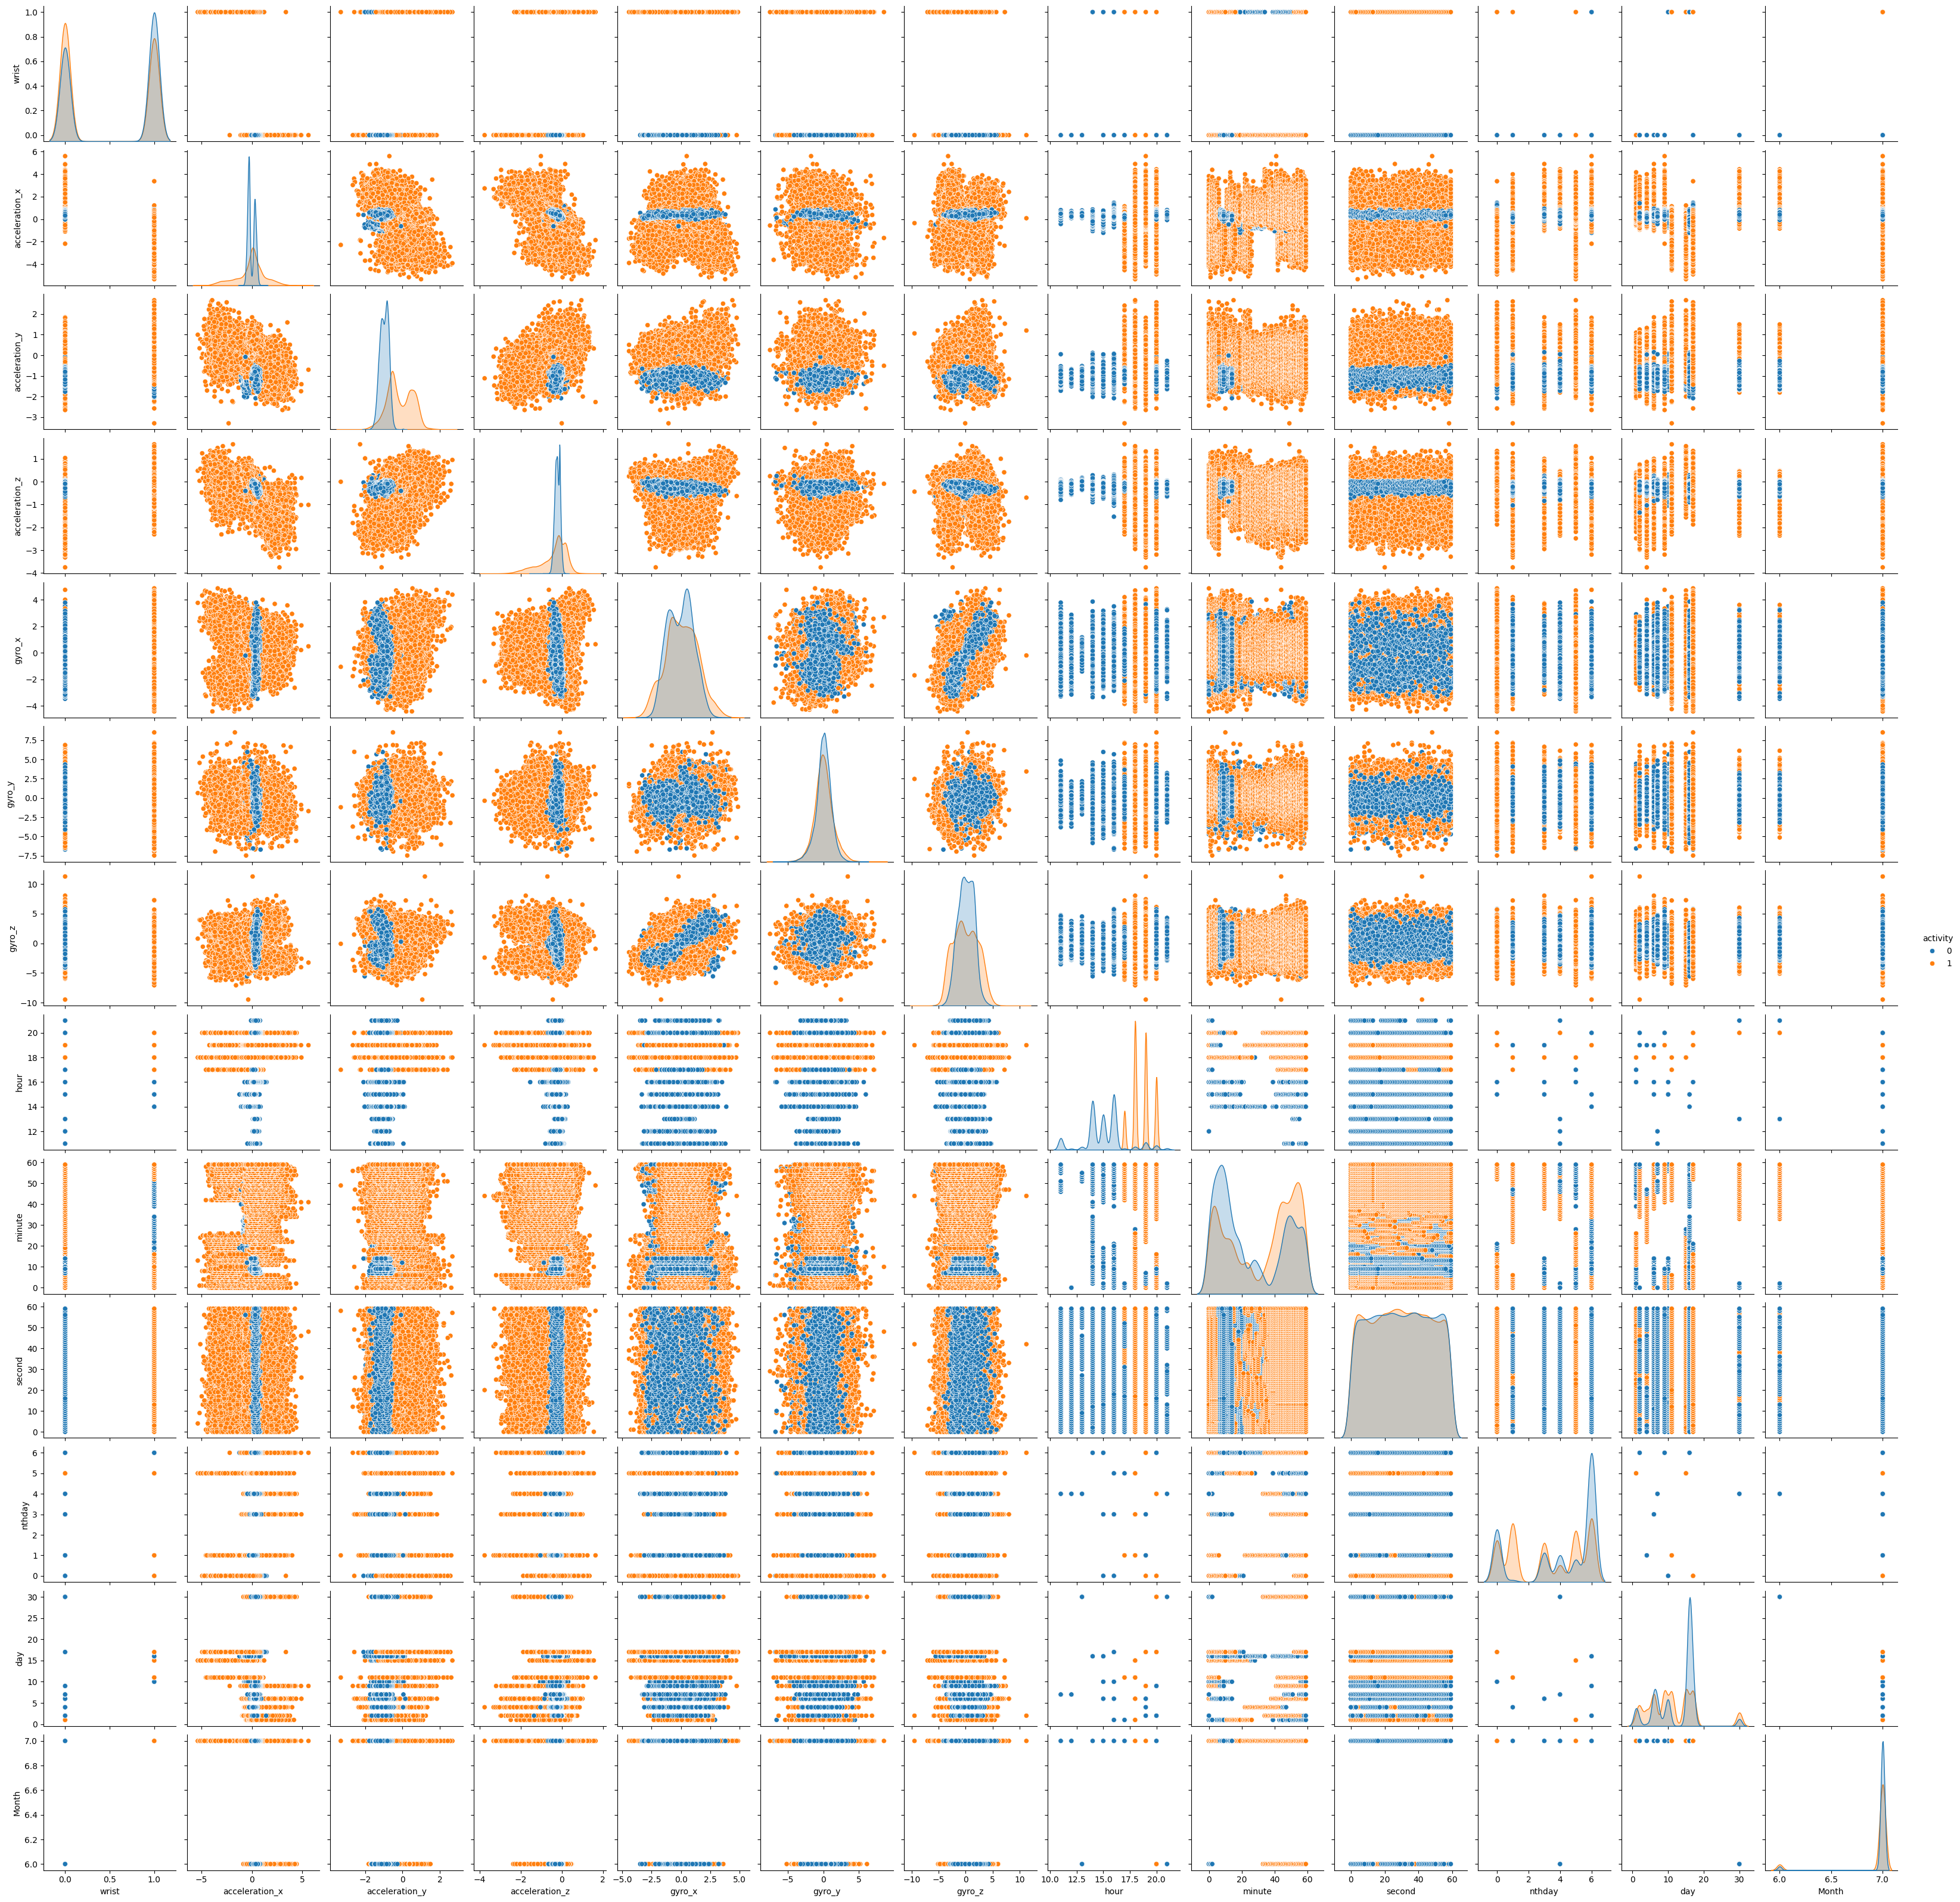

In [32]:
sns.pairplot(data, hue= 'activity')


### Data Preprocessing

In [33]:
print(data.isnull().sum()/len(data)*100)

date              0.0
time              0.0
username          0.0
wrist             0.0
activity          0.0
acceleration_x    0.0
acceleration_y    0.0
acceleration_z    0.0
gyro_x            0.0
gyro_y            0.0
gyro_z            0.0
time_con          0.0
hour              0.0
minute            0.0
second            0.0
nthday            0.0
dayofweek         0.0
day               0.0
Month             0.0
dtype: float64


There's no missing value to handle

#### dropping unneccesory columns - feature selection

In [34]:
data.drop(['date','time','username','wrist','time_con','dayofweek','day','Month'],axis=1,inplace=True)

In [35]:
data.head()

activity  acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  \
0         0          0.2650         -0.7814         -0.0076 -0.0590  0.0325   
1         0          0.6722         -1.1233         -0.2344 -0.1757  0.0208   
2         0          0.4399         -1.4817          0.0722 -0.9105  0.1063   
3         0          0.3031         -0.8125          0.0888  0.1199 -0.4099   
4         0          0.4814         -0.9312          0.0359  0.0527  0.4379   

   gyro_z  hour  minute  second  nthday  
0 -2.9296    13      51      15       4  
1  0.1269    13      51      16       4  
2 -2.4367    13      51      16       4  
3 -2.9336    13      51      16       4  
4  2.4922    13      51      16       4

cyclic information
as the columns hour,minute,second and nthday represents are in the cyclic manner by nature transforming these columns using sin function

In [36]:
cyclic_cols=['hour','minute','second','nthday']

for i in cyclic_cols:
  data[i]=np.sin(data[i])

### Saperating features and target values

In [37]:
X=data.drop('activity',axis=1)
y = data['activity']

### Scale the dataset with StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , ...,  0.85392082,
         0.87579031, -1.14858464],
       [ 0.74013342, -0.85156246,  0.16342314, ...,  0.85392082,
        -0.45523389, -1.14858464],
       [ 0.50997229, -1.39586742,  0.79323478, ...,  0.85392082,
        -0.45523389, -1.14858464],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, ...,  0.48223673,
         0.87579031, -0.19346657],
       [ 0.3307379 , -0.44895295,  0.4890107 , ...,  0.48223673,
         0.87579031, -0.19346657],
       [ 0.3852315 , -0.36177911,  0.45778716, ...,  0.48223673,
        -0.45523389, -0.19346657]])

In [39]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns) # converting the arrays into dataframe
X_scaled.head()

acceleration_x  acceleration_y  acceleration_z    gyro_x    gyro_y  \
0        0.336683       -0.332316        0.629311 -0.050391 -0.003924   
1        0.740133       -0.851562        0.163423 -0.143496 -0.013684   
2        0.509972       -1.395867        0.793235 -0.729734  0.057642   
3        0.374432       -0.379548        0.827334  0.092339 -0.372984   
4        0.551090       -0.559819        0.718668  0.038726  0.334271   

     gyro_z      hour    minute    second    nthday  
0 -1.541949  0.506283  0.853921  0.875790 -1.148585  
1  0.054624  0.506283  0.853921 -0.455234 -1.148585  
2 -1.284481  0.506283  0.853921 -0.455234 -1.148585  
3 -1.544039  0.506283  0.853921 -0.455234 -1.148585  
4  1.290147  0.506283  0.853921 -0.455234 -1.148585

### Train test splits


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

### **1. Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

logistic_pred = logistic.predict(X_test)

#### Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
confusion_matrix(y_test, logistic_pred)

array([[8135,  778],
       [1385, 7420]])

In [44]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8913
           1       0.91      0.84      0.87      8805

    accuracy                           0.88     17718
   macro avg       0.88      0.88      0.88     17718
weighted avg       0.88      0.88      0.88     17718



In [45]:
logistic_acc = accuracy_score(y_test, logistic_pred)
print("Accuracy for Logistic Regression: ", logistic_acc)

Accuracy for Logistic Regression:  0.8779207585506265


### **2. KNN (K Nearest Neighbor)**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  error_rate.append(np.mean(knn_pred != y_test))

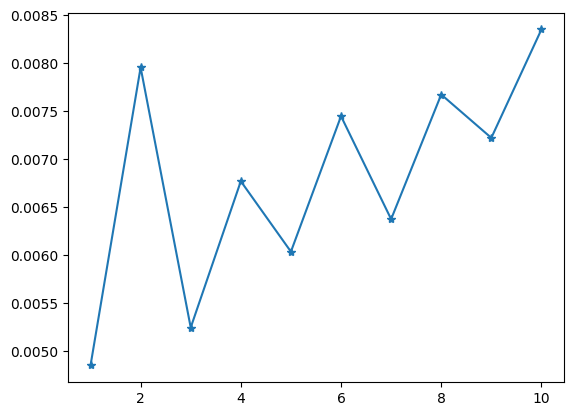

In [47]:
plt.plot(range(1,11), error_rate, marker = '*');

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

#### Model Evaluation

#### Model Evaluation

In [49]:
confusion_matrix(y_test, knn_pred)

array([[8896,   17],
       [  76, 8729]])

In [50]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8913
           1       1.00      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [51]:
knn_acc = accuracy_score(y_test, knn_pred)
print("Accuracy for KNN : ", knn_acc)

Accuracy for KNN :  0.9947511005756857


### **3. SVM (Support Vector Machine)**

In [52]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

#### Model Evaluation

In [53]:
confusion_matrix(y_test, svm_pred)

array([[8872,   41],
       [ 126, 8679]])

In [54]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8913
           1       1.00      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [55]:
svm_acc = accuracy_score(y_test, svm_pred)
print("Accuracy for SVM : ", svm_acc)

Accuracy for SVM :  0.9905745569477368


#### Hyper Parameter Tuning

In [56]:
grid = {
    'C': [0.01, 0.1, 1],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel':['rbf'],
    'random_state':[42]
}

In [57]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
gridcv = GridSearchCV(svc, grid, refit = True, verbose = 2, scoring = 'accuracy', cv = 5)
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=42; total time= 3.3min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=42; total time= 3.4min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=42; total time= 3.3min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=42; total time= 3.4min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=42; total time= 3.4min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=42; total time= 1.8min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=42; total time= 1.8min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=42; total time= 1.8min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=42; total time= 1.8min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=42; total time= 1.8min
[CV] END .....C=0.01, gamma=0.1, kernel=rbf, random_state=42; total time=  59.1s
[CV] END .....C=0.01, gamma=0.1, kernel=rbf, ran

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf'], 'random_state': [42]},
             scoring='accuracy', verbose=2)

In [58]:
gridcv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 42}

In [59]:
svm = SVC(C=1, gamma=1, kernel='rbf', random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

#### Model Evaluation

In [60]:
confusion_matrix(y_test, svm_pred)

array([[8873,   40],
       [  27, 8778]])

In [61]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [62]:
svm_acc = accuracy_score(y_test, svm_pred)
print("Accuracy for SVM : ", svm_acc)

Accuracy for SVM :  0.9962185348233434


### **4. Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

#### Model Evaluation

In [64]:
confusion_matrix(y_test, rfc_pred)

array([[8890,   23],
       [  19, 8786]])

In [65]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [66]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print("Accuracy for Random Forest : ", rfc_acc)

Accuracy for Random Forest :  0.9976295292922451


#### Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

rgrid = {
    'n_estimators': [30,40,50],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10,20,30],
    'bootstrap': [True, False],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [2,4,6]
}

rfcv = RandomizedSearchCV(estimator=rfc, scoring = 'accuracy', param_distributions= rgrid, cv = 3, verbose = 2,
                          random_state=42, n_jobs = -1, n_iter = 10)

In [68]:
rfcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 40, 50]},
                   random_state=42, scoring='accuracy', verbose=2)

In [69]:
rfcv.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [70]:
rfc = RandomForestClassifier(n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',
                             max_depth = 20, bootstrap = False)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

#### Model Evaluation

In [71]:
confusion_matrix(y_test, rfc_pred)

array([[8888,   25],
       [  24, 8781]])

In [72]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [73]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print("Accuracy for Random Forest : ", rfc_acc)

Accuracy for Random Forest :  0.9972344508409527


### **5. XGBoosting**

In [74]:
!pip install xgboost

In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

### Model Evaluation

In [76]:
confusion_matrix(y_test, xgb_pred)

array([[8907,    6],
       [   1, 8804]])

In [77]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [78]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print("Accuracy for XGBoost : ", xgb_acc)

Accuracy for XGBoost :  0.9996049215487075


#### Hyper Parameter Tuning for XGBoost

In [79]:
rgrid = {
    'gamma': [0.1, 0.2, 0.4, 0.8, 1, 2],
    'max_depth': [7, 4, 11, 16, 20],
    'learning_rate': [0.01, 0.001, 0.1, 0.5],
    'n_estimators': [25, 50, 75, 100]
}

xgbcf = XGBClassifier(verbosity = 2, random_state = 42)
rcv = RandomizedSearchCV(estimator = xgbcf, param_distributions=rgrid, scoring = 'accuracy',
                         n_iter = 10, cv = 5, verbose = 2, random_state=42, n_jobs = 1)

rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.1, learning_rate=0.5, max_depth=16, n_estimators=50; total time=   0.4s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=16, n_estimators=50; total time=   1.9s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=16, n_estimators=50; total time=   0.4s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=16, n_estimators=50; total time=   0.7s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=16, n_estimators=50; total time=   0.4s
[CV] END gamma=2, learning_rate=0.01, max_depth=16, n_estimators=75; total time=   1.1s
[CV] END gamma=2, learning_rate=0.01, max_depth=16, n_estimators=75; total time=   1.1s
[CV] END gamma=2, learning_rate=0.01, max_depth=16, n_estimators=75; total time=  13.5s
[CV] END gamma=2, learning_rate=0.01, max_depth=16, n_estimators=75; total time=  14.0s
[CV] END gamma=2, learning_rate=0.01, max_depth=16, n_estimators=75; total time=   7.3s
[CV] END gamma=1, learning_rate=0.5, max_depth=16, n_e

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=1,
                   param_distributions={'gamma': [0.1, 0.2, 0.4, 0.8, 1, 2],
                                        'learning_rate': [0.01, 0.001, 0.1,
                                                          0.5],
                                        'max_depth': [7, 4, 11, 16, 20],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [80]:
rcv.best_params_

{'n_estimators': 50, 'max_depth': 16, 'learning_rate': 0.5, 'gamma': 0.1}

In [81]:
xgb = XGBClassifier(n_estimators = 50, max_depth = 16,
                    learning_rate = 0.5, gamma = 0.1, random_state = 42)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

#### Model Evaluation

In [82]:
confusion_matrix(y_test, xgb_pred)

array([[8905,    8],
       [   7, 8798]])

In [83]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [84]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print("Accuracy for XGBoost : ", xgb_acc)

Accuracy for XGBoost :  0.999153403318659


### **6. Naive Bayes**

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

#### Model Evaluation

In [86]:
confusion_matrix(y_test, nb_pred)

array([[8801,  112],
       [ 566, 8239]])

In [87]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8913
           1       0.99      0.94      0.96      8805

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718



In [88]:
nb_acc = accuracy_score(y_test, nb_pred)
print("Accuracy for XGBoost : ", nb_acc)

Accuracy for XGBoost :  0.9617338300033864


### **7. Light GBM**

In [89]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 35560, number of negative: 35310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1671
[LightGBM] [Info] Number of data points in the train set: 70870, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501764 -> initscore=0.007055
[LightGBM] [Info] Start training from score 0.007055


#### Model Evaluation

In [90]:
confusion_matrix(y_test, lgbm_pred)

array([[8905,    8],
       [   2, 8803]])

In [91]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



In [92]:
lgbm_acc = accuracy_score(y_test, lgbm_pred)
print("Accuracy for Light GBM : ", lgbm_acc)

Accuracy for Light GBM :  0.9994356022124393


## Model Comparison Report

In [93]:
model_accuracy = pd.DataFrame([logistic_acc, knn_acc, svm_acc, rfc_acc, xgb_acc, nb_acc, lgbm_acc ],
                              index = ['Logistic Regression', 'KNN Classifier', 'Support Vector Machine (SVM)', 'RandomForest Classifier', "XGBoosting", "Naive Bayes (Gaussian)", 'Light GBM'],
                              columns= ['Accuracy'])

model_accuracy = model_accuracy.sort_values('Accuracy', ascending = False)

In [94]:
sns.barplot(x = model_accuracy.Accuracy, y = model_accuracy.index, color = 'skyblue');

We've implemented here with seven different models also implemented hyperparameter when its needed.

Among the developing models we get
- Logistic Regression is providing lowest accuracy than others.
- The main interesting part is using hyperparameter for three models. where the accuracy of "SVM" increases after using hyper parameter tuning and interestingly the accuracy of "RandomForest Classifier" and "XGBoosting" dropped slightly after using hyperparameter.
- If we **use hyperparameter for "XGBoost"** - as we've mentioned that the accuracy reduced a very little fraction - the accuracy of XGBoost(0.99915) got less than LightGBM. **in that case, the LightGBM can provide best accuracy with 0.99943**
- If we **not use hyperparameter for "XGBoost". the best accuracy occurs in "XGBoost" which is 0.99960**  

## Report on Challanges faced

we have faced several challenges during the work like

- First challenge we faced in 'date', 'time' columns. like how to deal with these two columns and also get a proper format so that we can make it proper use during model building.
- Second the challenge we faced is in selecting the appropriate columns which necessary. and find out the unnecessary columns to drop it.
- We got to understand about why actually we need to select StandardScalar over MinMaxScalar particularly for this project.
- Although hyperparameter tuning is necessary to optimize model performance, in this project we got to understand maybe in some cases it's better not use which depends on how we preprocessed data for which can change the need of hyperparameters there.

